<a href="https://colab.research.google.com/github/sagarpatiler/NLP/blob/main/gensim_fake_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dependencies and testing

In [ ]:
!pip3 install --upgrade gensim --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 45.7 MB/s 


In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim.downloader as api

In [ ]:
wv=api.load('glove-wiki-gigaword-50')

In [ ]:
wv.similarity('good','boy')

0.5714978

In [ ]:
wv.most_similar('india')

[('indian', 0.8648794889450073),
 ('pakistan', 0.8529723286628723),
 ('malaysia', 0.816650927066803),
 ('bangladesh', 0.8154239058494568),
 ('delhi', 0.8142766952514648),
 ('indonesia', 0.7939143180847168),
 ('thailand', 0.7864409685134888),
 ('sri', 0.7809487581253052),
 ('lanka', 0.7792481780052185),
 ('africa', 0.7728373408317566)]

In [ ]:
wv.most_similar(positive=['germany','paris'],negative=['berlin'])

[('france', 0.9267502427101135),
 ('french', 0.8315804600715637),
 ('belgium', 0.8090037703514099),
 ('spain', 0.7880212068557739),
 ('switzerland', 0.7626518607139587),
 ('italy', 0.7385514974594116),
 ('netherlands', 0.7350598573684692),
 ('europe', 0.7275044322013855),
 ('european', 0.7212151288986206),
 ('swiss', 0.7204034328460693)]

In [ ]:
wv.doesnt_match('john jonathan ram lily'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'ram'

In [ ]:
wv_great = wv["great"]
wv_great.shape

(50,)

Fake vs Real News Classification 

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets

In [ ]:
opendatasets.download('https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/download?datasetVersionNumber=1')

Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')

In [ ]:
df1=df1.assign(label='fake')

In [ ]:
df1.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
df2=pd.read_csv('/content/fake-and-real-news-dataset/True.csv')

In [ ]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df2=df2.assign(label='true')

In [ ]:
df2.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
df=pd.concat([df1,df2])

In [ ]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
df['label'].isnull().sum()

0

In [ ]:
df['label_num']=df['label'].map({'fake':0,'true':1})

In [ ]:
df.head()

,title,text,subject,date,label,label_num
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,0


In [ ]:
df=df[['text','label_num']]

In [ ]:
df.head()

,text,label_num
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


preprocessing

In [ ]:
!python -m spacy download en_core_web_lg

2022-10-24 02:32:13.227326: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 13 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_lg') 


In [ ]:
def preproc_vect(text):
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return wv.get_mean_vector(filtered_tokens)



In [ ]:
t=preproc_vect('how are you sagar')
t.shape

(50,)

In [ ]:
df['vector']=df['text'].apply(lambda text:preproc_vect(text))

In [ ]:
df.head()

,text,label_num,vector
0,Donald Trump just couldn t wish all Americans ...,0,"[-0.0025150229, 0.03865383, 0.055941496, -0.01..."
1,House Intelligence Committee Chairman Devin Nu...,0,"[0.029671079, 0.029671174, 0.015749456, 0.0231..."
2,"On Friday, it was revealed that former Milwauk...",0,"[0.023072833, -0.0010783874, 0.04387399, -0.02..."
3,"On Christmas day, Donald Trump announced that ...",0,"[-0.0010510853, 0.056555785, 0.044824842, 0.04..."
4,Pope Francis used his annual Christmas Day mes...,0,"[0.058998555, 0.046431687, -0.0030548724, -0.0..."


Train-Test splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2, 
    random_state=2022,
    stratify=df.label_num
)

Reshaping the X_train and X_test so as to fit for models

In [ ]:
import numpy as np

In [ ]:
X_train[:1]

array([array([ 4.91897352e-02,  1.25844004e-02,  5.98841272e-02,  6.57002733e-04,
               3.72984186e-02, -2.98390840e-03, -2.61588600e-02, -1.01483315e-02,
               2.33702213e-02,  6.34986814e-03,  3.33601329e-03,  8.62808060e-03,
              -5.26521839e-02,  1.37928221e-02,  4.64337692e-02,  7.23848119e-02,
               3.09895556e-02, -4.44437470e-03, -2.15359740e-02, -5.40110245e-02,
               3.35093476e-02,  1.46058667e-03,  3.75276594e-03, -3.92386578e-02,
               2.86085550e-02, -2.90326238e-01, -1.87921450e-02, -9.64728184e-03,
               5.92678562e-02,  3.30196554e-03,  4.86115098e-01,  3.96075509e-02,
              -8.62641856e-02, -6.36749044e-02, -1.44403996e-02, -4.21293713e-02,
               6.02157197e-05, -3.59047484e-03, -5.24863824e-02, -2.94435639e-02,
              -2.89702062e-02, -1.01328827e-02,  3.96171659e-02,  4.90486389e-03,
               2.66361572e-02,  1.49613088e-02, -2.07324419e-02,  9.69710648e-02,
              -3

In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (35918,)
Shape of X_test before reshaping:  (8980,)
Shape of X_train after reshaping:  (35918, 50)
Shape of X_test after reshaping:  (8980, 50)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [ ]:
clf = GradientBoostingClassifier()

In [ ]:
clf.fit(X_train_2d, y_train)


GradientBoostingClassifier()

In [ ]:
y_pred = clf.predict(X_test_2d)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4696
           1       0.90      0.91      0.90      4284

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4244,  452],
       [ 380, 3904]])

Text(51.0, 0.5, 'Truth')

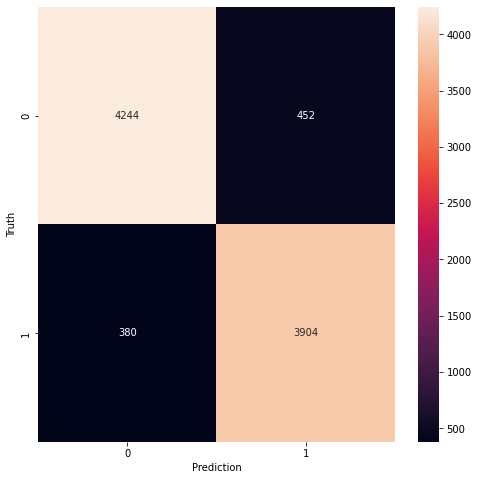

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (8,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')